<a href="https://colab.research.google.com/github/YagyanshB/education-analytics/blob/main/student_performance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

# Uploading our Dataset & Investigating It:

In [52]:
df = pd.read_csv('data.csv')

In [53]:
type(df)

pandas.core.frame.DataFrame

In [54]:
df.isnull().sum()

,0
"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target",0


In [55]:
# Clearly our data has formatting issues and we would be carrying out data formatting and data cleaning

df.columns

Index(['Marital status;Application mode;Application order;Course;"Daytime/evening attendance\t";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target'], dtype='object')

In [56]:
# Read the CSV file using semicolon as separator

df = pd.read_csv('data.csv',
    sep=';',  # Use semicolon as separator
    encoding='utf-8',  # Handle potential encoding issues
    na_values=['...'],  # Treat ... as missing values
    skipinitialspace=True  # Skip spaces after separators
)

# Clean up column names
df.columns = (df.columns
    .str.strip()  # Remove leading/trailing whitespace
    .str.replace('\t', '')  # Remove tab characters
    .str.replace('"', '')  # Remove quotation marks
)

# Display the first few rows to verify
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                           122.0     

In [57]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


# Basic Data Exploration

In [58]:
print("Dataset Shape:", df.shape)
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])
print("Number of columns:", df.columns.tolist())
print("First few rows:")
df.head(5)

Dataset Shape: (4424, 37)
Number of rows: 4424
Number of columns: 37
Number of columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (with

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Data Quality Checks

In [59]:
# Checking for missing values

print("\nNumber of Missing Values:")
print(df.isnull().sum())

# Get data types for columns

print("\nData Types of columns:")
print(df.dtypes)

# Basic Statistics

print("\nBasic Statistics:")
print(df.describe())

# Categorical Columns Summary

print("\nCategorical Columns Summary:")
print(df.describe(include='object'))


Number of Missing Values:
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                   

# Data Preprocessing:

In [60]:
# Now we need to convert categorical variables

le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df[col + 'encoded'] = le.fit_transform(df[col].astype(str))

In [61]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


# Exploratory Data Analysis:

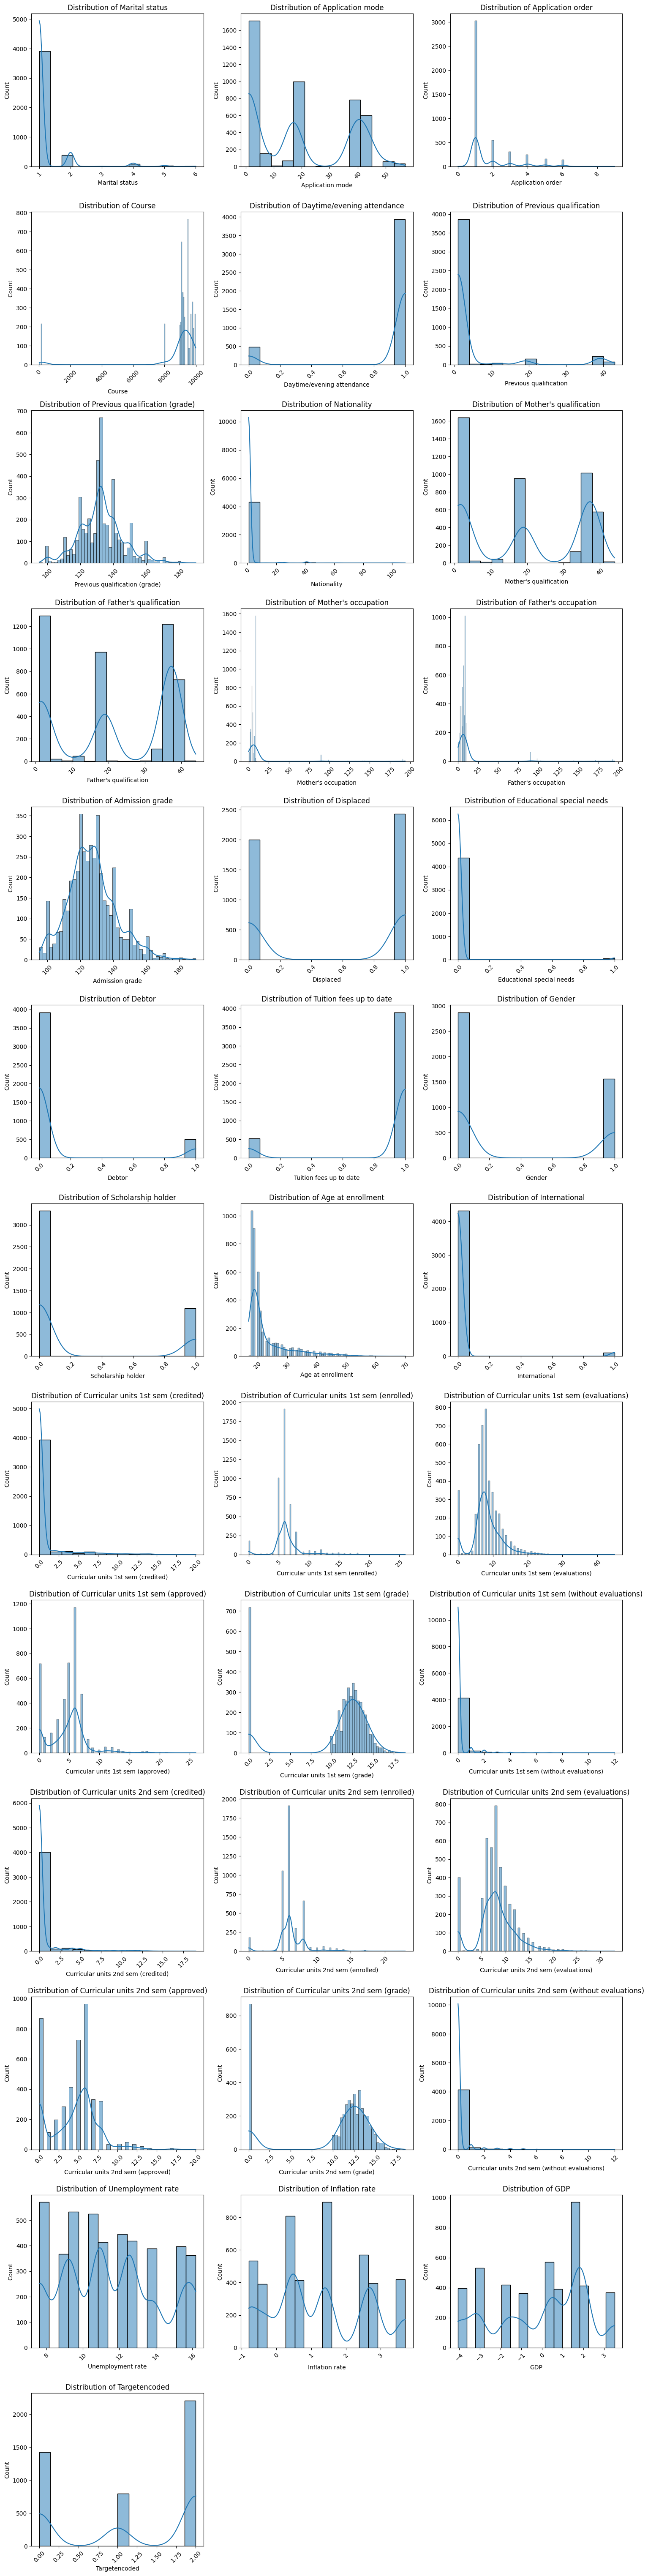

In [64]:
# Distribution of numerical variables

def plot_numerical_distributions(df, numerical_cols):
    plt.figure(figsize=(15, 5*len(numerical_cols)//3))
    for i, col in enumerate(numerical_cols, 1):
        plt.subplot(len(numerical_cols)//3 + 1, 3, i)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_numerical_distributions(df, numerical_cols)

In [63]:
# Change specific columns

df = df.rename(columns={'Nacionality': 'Nationality'})

In [66]:
df['Target'].value_counts()

,count
Target,
Graduate,2209
Dropout,1421
Enrolled,794


# Specific Analysis based on the Education Dataset:

In [87]:
# Analysing Academic Performance

def analyse_academic_performance(df):

  print("\nAverage Grades by Gender: ")
  print(df.groupby('Gender')['Admission grade'].mean())

  print("\nAverage Grades by Nationality: ")
  print(df.groupby('Nationality')['Admission grade'].mean())

  print("\nAverage Grades by Target: ")
  print(df.groupby('Target')['Admission grade'].mean())

  print("\nAverage Grades by Target and Gender: ")
  print(df.groupby(['Target', 'Gender'])['Admission grade'].mean())

  print("\nAverage Grades by Target and Nationality: ")

  print("\nAverage Grades by Scholarship Status: ")
  print(df.groupby('Scholarship holder')['Admission grade'].mean())

  # Success rate in semesters
  df['first_sem_success_rate'] = df['Curricular units 1st sem (approved)'] / df['Curricular units 1st sem (enrolled)']
  df['second_sem_success_rate'] = df['Curricular units 2nd sem (approved)'] / df['Curricular units 2nd sem (enrolled)']

  print("\nAverage success rates:")
  print("First semester:", df['first_sem_success_rate'].mean())
  print("Second semester:", df['second_sem_success_rate'].mean())

In [88]:
analyse_academic_performance(df)


Average Grades by Gender: 
Gender
0    126.889435
1    127.141581
Name: Admission grade, dtype: float64

Average Grades by Nationality: 
Nationality
1      126.919680
2      136.300000
6      128.553846
11     127.766667
13     137.600000
14     150.800000
17     118.100000
21     108.950000
22     143.492308
24     124.380000
25     120.700000
26     132.807143
32     160.000000
41     121.176316
62     125.150000
100    115.900000
101    139.250000
103    150.100000
105    135.900000
108    190.000000
109    126.900000
Name: Admission grade, dtype: float64

Average Grades by Target: 
Target
Dropout     124.961365
Enrolled    125.534257
Graduate    128.794432
Name: Admission grade, dtype: float64

Average Grades by Target and Gender: 
Target    Gender
Dropout   0         124.467778
          1         125.468331
Enrolled  0         125.408624
          1         125.733550
Graduate  0         128.373329
          1         130.070803
Name: Admission grade, dtype: float64

Average Gra

In [74]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

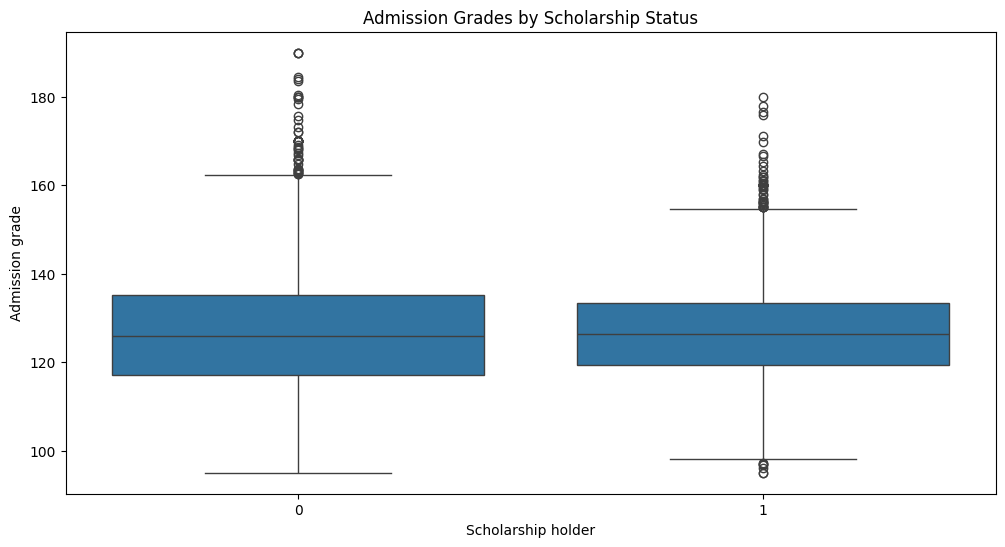

In [89]:
# Visualization of key relationships
plt.figure(figsize=(12, 6))
sns.boxplot(x='Scholarship holder', y='Admission grade', data=df)
plt.title('Admission Grades by Scholarship Status')
plt.show()

In [95]:
def visualize_group_comparisons(df):
    # Set the style for better-looking plots
    plt.style.use('default')

    # 1. Gender Comparison
    plt.figure(figsize=(10, 6))
    # Bar plot
    sns.barplot(x='Gender', y='Admission grade', data=df,
                ci=95,  # Add confidence intervals
                palette='deep')
    plt.title('Average Admission Grades by Gender')
    plt.xticks(rotation=0)

    # Add value labels on top of bars
    for i in plt.gca().containers:
        plt.gca().bar_label(i, fmt='%.2f')

    plt.show()

    # 2. Nationality Comparison
    plt.figure(figsize=(12, 6))
    avg_by_nationality = df.groupby('Nationality')['Admission grade'].mean().sort_values(ascending=False)

    sns.barplot(x=avg_by_nationality.index,
                y=avg_by_nationality.values,
                palette='viridis')
    plt.title('Average Admission Grades by Nationality')
    plt.xticks(rotation=45)

    # Add value labels
    for i in plt.gca().containers:
        plt.gca().bar_label(i, fmt='%.2f')

    plt.tight_layout()
    plt.show()

    # 3. Target Comparison with Box Plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Target', y='Admission grade', data=df,
                palette='Set3')
    plt.title('Distribution of Admission Grades by Target')

    # Add swarmplot for individual points
    sns.swarmplot(x='Target', y='Admission grade', data=df,
                  color='0.25', size=4, alpha=0.5)
    plt.show()

    # 4. Target and Gender Interaction
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Target', y='Admission grade', hue='Gender',
                data=df, palette='Set2')
    plt.title('Average Admission Grades by Target and Gender')

    # Add value labels
    for i in plt.gca().containers:
        plt.gca().bar_label(i, fmt='%.2f')

    plt.show()

    # 5. Scholarship Status with Violin Plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Scholarship holder', y='Admission grade',
                   data=df, inner='box', palette='husl')
    plt.title('Distribution of Admission Grades by Scholarship Status')

    # Add individual points
    sns.stripplot(x='Scholarship holder', y='Admission grade',
                  data=df, color='red', alpha=0.3, size=4)
    plt.show()

    # 6. Interactive Plot using Plotly
    fig = px.box(df, x='Target', y='Admission grade',
                 color='Gender',
                 title='Interactive: Admission Grades by Target and Gender',
                 points='all')  # Show all points
    fig.show()

<ipython-input-95-ff8ea6fbdd22>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='Gender', y='Admission grade', data=df,
<ipython-input-95-ff8ea6fbdd22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Admission grade', data=df,


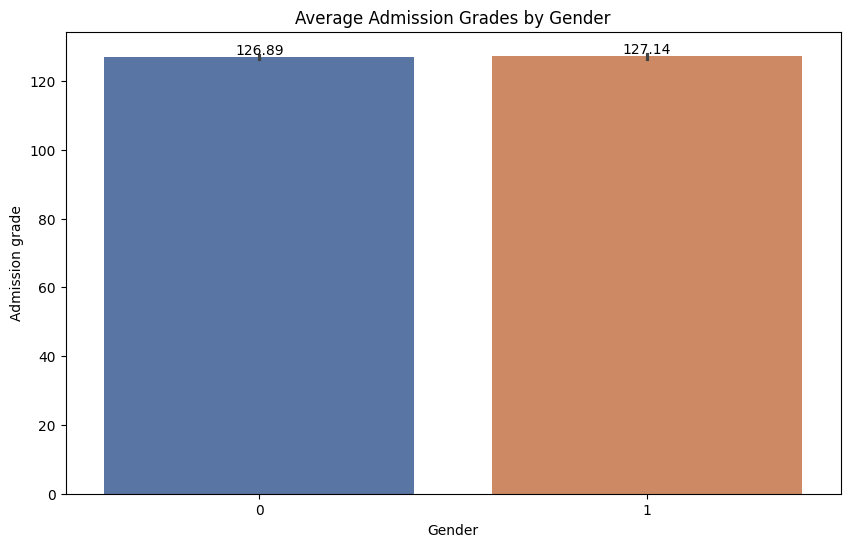

<ipython-input-95-ff8ea6fbdd22>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_by_nationality.index,


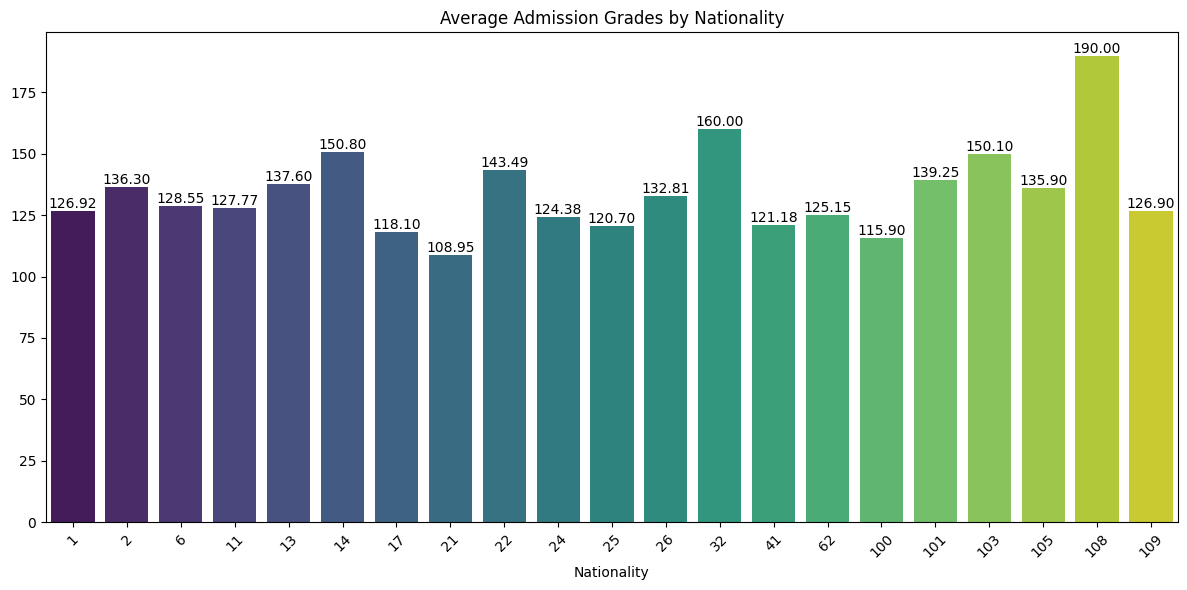

<ipython-input-95-ff8ea6fbdd22>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Target', y='Admission grade', data=df,
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 23.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3399: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:

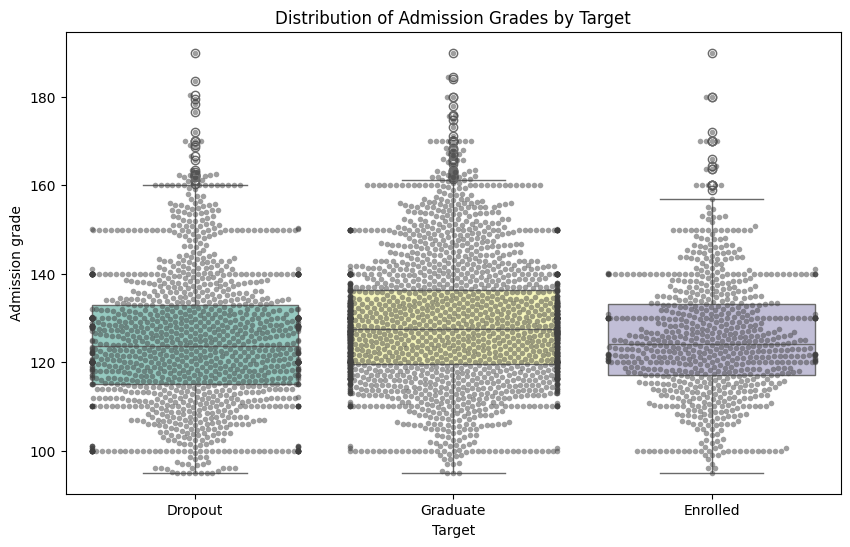

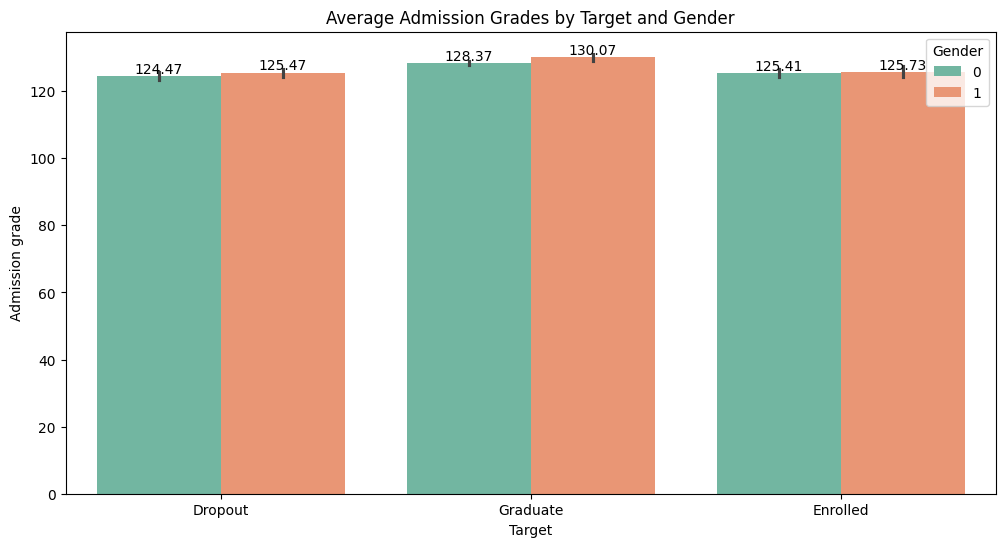

<ipython-input-95-ff8ea6fbdd22>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Scholarship holder', y='Admission grade',


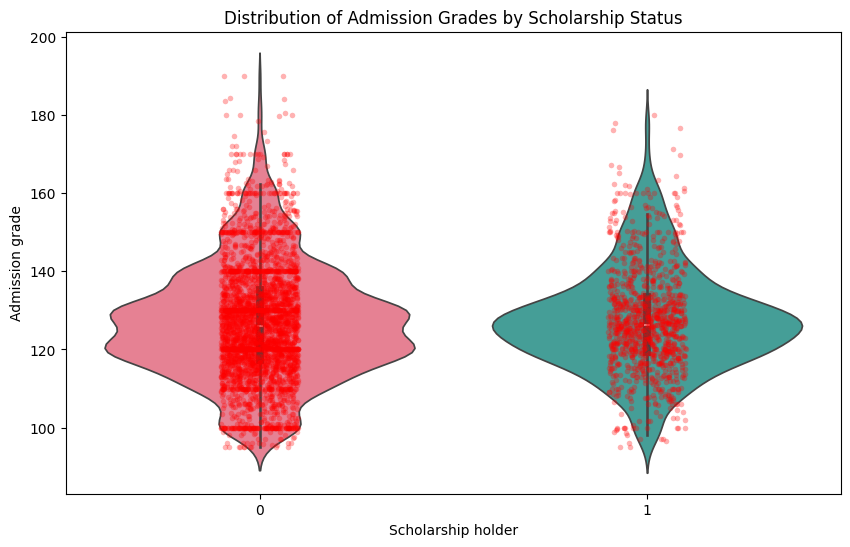

In [96]:
visualize_group_comparisons(df)

# Economic Factor Analysis:

In [97]:
# Analysing the factors between economic analysis and academic performance:

def analyse_economic_factors(df):
  economic_factors = ['Unemployment rate', 'Inflation rate', 'GDP']
  performance_metrics = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

  correlation = df[economic_factors + performance_metrics].corr()

  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
  plt.title('Correlation between Economic Factors and Academic Performance')

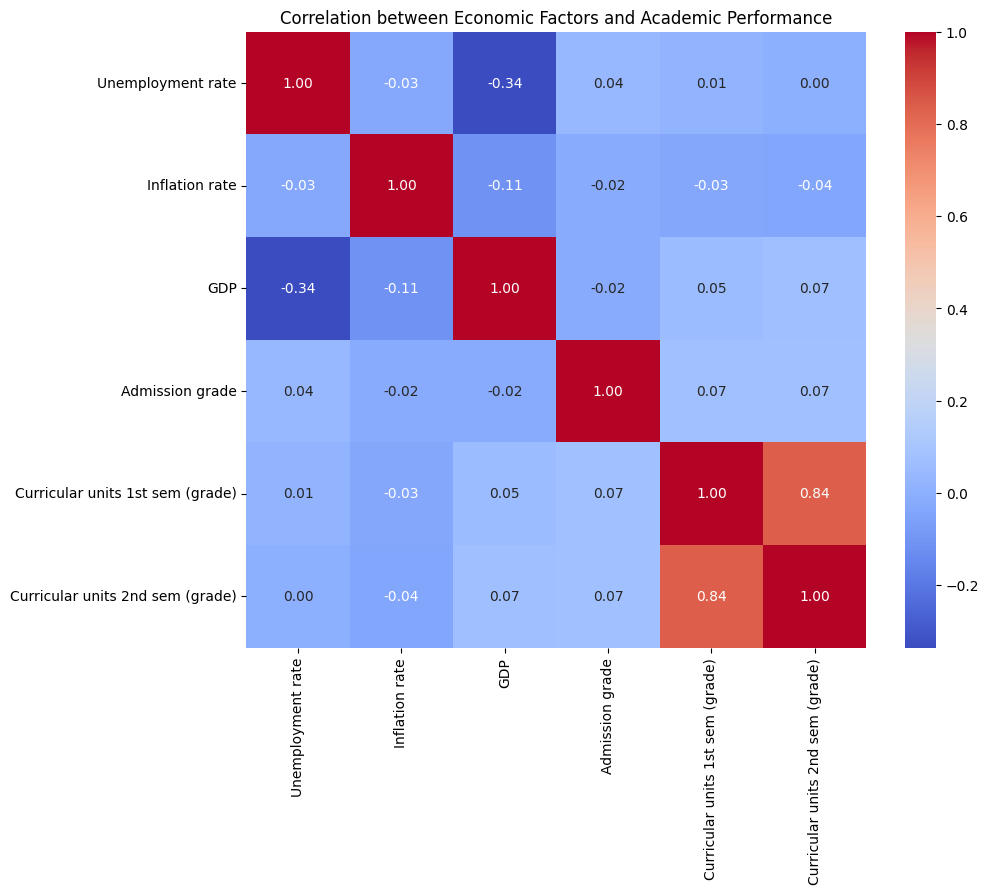

In [98]:
analyse_economic_factors(df)

# Student Demographic Analysis:

In [99]:
# Analysing student demographics and their impact

def analyse_student_demographics(df):

  # Age Distribution
  plt.figure(figsize=(10, 6))
  sns.histplot(df['Age at enrollment'], bins=20, kde=True)
  plt.title('Distribution of Age at Enrollment')
  plt.xlabel('Age')

  # Cross-tabulation of various demographic factors
  print("\nCross-tabulation of Gender and Scholarship status:")
  print(pd.crosstab(df['Gender'], df['Scholarship holder']))

  # Analysis of international vs domestic students
  print("\nPerformance comparison - International vs Domestic students:")
  print(df.groupby('International')['Admission grade'].describe())


Cross-tabulation of Gender and Scholarship status:
Scholarship holder     0    1
Gender                       
0                   2001  867
1                   1324  232

Performance comparison - International vs Domestic students:
                count       mean        std    min     25%     50%      75%  \
International                                                                 
0              4314.0  126.91968  14.307294   95.0  117.90  126.00  134.700   
1               110.0  129.27000  20.130453  100.0  117.95  129.55  139.475   

                 max  
International         
0              190.0  
1              190.0  


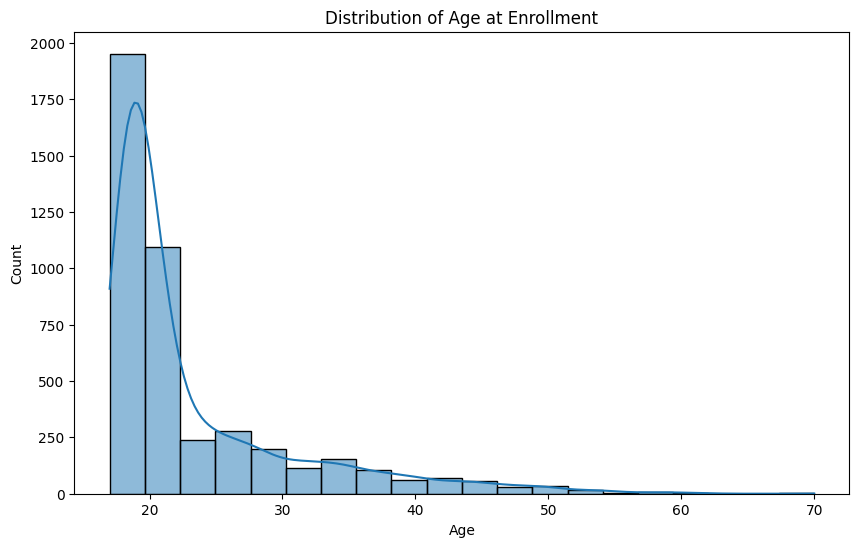

In [100]:
analyse_student_demographics(df)

In [101]:
def generate_insights_report(df):
    insights = []

    # Overall success rate
    overall_success = (df['Curricular units 2nd sem (approved)'].sum() /
                      df['Curricular units 2nd sem (enrolled)'].sum())
    insights.append(f"Overall success rate: {overall_success:.2%}")

    # Scholarship impact
    scholarship_performance = df.groupby('Scholarship holder')['Admission grade'].mean()
    insights.append(f"Average grade difference (Scholarship vs Non-Scholarship): "
                   f"{scholarship_performance[1] - scholarship_performance[0]:.2f}")

    # Age impact
    age_correlation = df['Age at enrollment'].corr(df['Admission grade'])
    insights.append(f"Correlation between age and admission grade: {age_correlation:.2f}")

    return "\n".join(insights)

print("\nKey Insights:")
print(generate_insights_report(df))


Key Insights:
Overall success rate: 71.18%
Average grade difference (Scholarship vs Non-Scholarship): 0.63
Correlation between age and admission grade: -0.03
